<a href="https://colab.research.google.com/github/Paulina9555/Test/blob/master/uczenie_nienadzorowane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

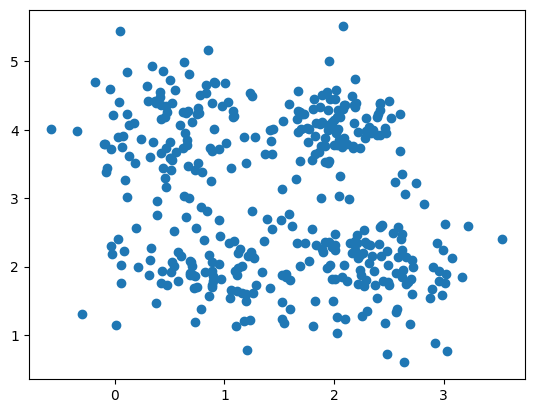

In [ ]:
rnd = np.random.RandomState(25)

x1 = sorted(list(rnd.normal(1.0, 0.5, size = 100)))
y1 = list(rnd.normal(2.0, 0.4, size = 100))
x2 = sorted(list(rnd.normal(2.0, 0.3, size =100)))
y2 = list(rnd.normal(4.0, 0.4, size = 100))
x3 = sorted(list(rnd.normal(2.4, 0.4, size = 100)))
y3 = list(rnd.normal(2.0, 0.5, size = 100))
x4 = sorted(list(rnd.normal(0.5, 0.4, size = 100)))
y4 = list(rnd.normal(4.0, 0.5, size = 100))

fig, ax = plt.subplots()
ax.scatter(x1+x2+x3+x4, y1+y2+y3+y4)
plt.show()

In [ ]:
models = []
first_model = [(x1+x2+x3+x4, y1+y1+y3+y3)]
second_model = [(x1+x3+x3 , y1+y3+y4), (x2+y2)]
third_model = [(x1+x4 , y1+y4), (x2, y2), (x3, y3)]
fourth_model = [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
fifth_model = [(x1[:int(len(x1)/2)], y1[:int(len(y1)/2)]),
               (x1[int(len(x1)/2):], y1[int(len(y1)/2):]),
               (x2, y2), (x3, y3), (x4, y4)]
sixth_model = [(x1[:int(len(x1)/2)], y1[:int(len(y1)/2)]),
              (x1[int(len(x1)/2):], y1[int(len(y1)/2):]),
              (x2[:int(len(x2)/2)], y2[:int(len(y2)/2)]),
              (x2[int(len(x2)/2):], y2[int(len(y2)/2):]),
              (x3, y3),(x4, y4)]

seventh_model = [(x1[:int(len(x1)/2)], y1[:int(len(y1)/2)]),
              (x1[int(len(x1)/2):], y1[int(len(y1)/2):]),
              (x2[:int(len(x2)/2)], y2[:int(len(y2)/2)]),
              (x2[int(len(x2)/2):], y2[int(len(y2)/2):]),
              (x3[:int(len(x3)/2)], y3[:int(len(y3)/2)]),
              (x3[int(len(x3)/2):], y3[int(len(y3)/2):]),
              (x4, y4)]
eight_model = [(x1[:int(len(x1)/2)], y1[:int(len(y1)/2)]),
              (x1[int(len(x1)/2):], y1[int(len(y1)/2):]),
              (x2[:int(len(x2)/2)], y2[:int(len(y2)/2)]),
              (x2[int(len(x2)/2):], y2[int(len(y2)/2):]),
              (x3[:int(len(x3)/2)], y3[:int(len(y3)/2)]),
              (x3[int(len(x3)/2):], y3[int(len(y3)/2):]),
              (x4[int(len(x4)/2):], y4[int(len(y4)/2):])]
models = [first_model, second_model, third_model,
         fourth_model, fifth_model, sixth_model,
         seventh_model, eight_model]


In [ ]:
def sse(clusters):
   result = 0
   for xs, ys in clusters:
       distance = calculate_distance(xs, ys)
       result += distance / len(xs)
   return result

def calculate_distance(xs, ys):
   result = 0
   for x1, y1 in zip(xs, ys):
       for x2, y2 in zip(xs, ys):
           result += np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
   return result

distances = []
for model in models:
 distances.append(sse(model))


plt.plot(list(range(len(distances))), distances)
plt.show()


ValueError: ignored

In [ ]:
def dist_to_cluster(point, cluster):
   x_i, y_i = point
   xs, ys = cluster
   distances = 0
   for x_j, y_j in zip(xs, ys):
       distances += np.sqrt((x_j - x_i)**2 + (y_j - y_i)**2)
   return distances

def a(point, cluster):
   distances = dist_to_cluster(point, cluster)
   return 1 / (len(cluster[0]) - 1) * distances

def b(point, other_clusters):
   x_i, y_i = point
   result = [1 / len(cluster[0]) * dist_to_cluster(point, cluster)
             for cluster
             in other_clusters]
   return min(result)

def silhouette(point, cluster, other_clusters):
   if len(cluster) == 1:
       return 0
   else:
       ar = a(point, cluster)
       br = b(point, other_clusters)
       return (br - ar) / max(ar, br)

def global_silhouette(clusters):
 if len(clusters) == 1:
   return 0
 results = []
 for key, cluster in clusters.items():
     other_clusters = [c for k, c in clusters.items() if k != key]
     for point in zip(*cluster):
         s = silhouette(point, cluster, other_clusters)
         results.append(s)
 return np.mean(results)

sil = []
for model in models:
 to_dict = {}
 for index, cluster in enumerate(model):
   to_dict[index] = cluster
  returned = global_silhouette(to_dict)
 sil.append(returned)

plt.plot(list(range(1, len(sil)+1)), sil)
plt.show()


IndentationError: ignored

In [ ]:
from itertools import permutations

def dist_from_centroid(centroid, xs, ys):
  return np.mean([np.sqrt((centroid[0]-xs)**2 + (centroid[1]-ys)**2)])

def dist_between_centroids(point1, point2):
  return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def davies_bouldin(clusters):
  if len(clusters) == 1:
    return None
  centroids = [(np.mean(x), np.mean(y)) for x, y in clusters.values()]

  di_per_cluster = [dist_from_centroid(centroid, xs, ys)
                    for centroid, (xs, ys)
                    in zip(centroids, clusters.values())]

  clusters_data = [(centroid, di)
                   for centroid, di
                   in zip(centroids, di_per_cluster)]

  Dij_list = []
  for cluster_data in clusters_data:
    temp = [cluster for cluster in clusters_data if cluster != cluster_data]
    Dij = []
    for other_cluster in temp:
      dij = dist_between_centroids(other_cluster[0], cluster_data[0])
      Dij.append(other_cluster[1]+ cluster_data[1]/dij)
    max_Dij = max(Dij)
    Dij_list.append(max_Dij)


  return sum(Dij_list)/len(clusters)


db = []
for model in models:
  to_dict = {}
  for index, cluster in enumerate(model):
    to_dict[index] = cluster
  returned = davies_bouldin(to_dict)
  db.append(returned)

plt.plot(list(range(1, len(db)+1)), db)
plt.show()


ValueError: ignored

In [ ]:
def load_dataset(filename, class_column, index_col=None):
   dataset = pd.read_csv(f'ML-datasets/iris.csv', index_col=index_col)
   dataset['class'] = dataset[class_column].astype('category').cat.codes
   classes = dataset.pop(class_column).unique()
   return dataset, classes

iris, iris_classes = load_dataset('iris', 'species')

y = iris.pop('class')
X = iris


FileNotFoundError: ignored

In [ ]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


NameError: ignored